<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Курсова робота з дисципліни  "Методи оптимізації-2"**  
## **Тема : Метод випадкового пошуку з постійним радіусом**
*Студента групи КМ-81 Руденка Романа Олександровича*

**Дана курсова робота направлена на дослідження збіжності методу випадкового пошуку з постійним радіусом.**

***Постановка задачі***

Дослідити збіжність методу випадкового пошуку з постійним радіусом при мінімізації степеневої функції  в залежності від:
1.	Виду метода одновимірного пошуку (ДСК-Пауелла або Золотого перетину).
2.	Точності метода одновимірного пошуку.
3.	Значення параметру в алгоритмі Свена.
4.	Параметрів методу (радіус, кут сектора пошуку).
  
Використати метод штрафних функцій (метод внутрішньої точки) для умовної оптимізації в залежності від:
1.	Розташування локального мінімума (всередині/поза допустимою областю).
2.	Виду допустимої області (випукла/невипукла).


## Зміст

* Анотація 
* Вступ 
* Вирішення поставленої задачі
  * Імпортування бібліотек
  * Визначення констант
  * Використані функції
  * Обчислення
  * Відображення результатів  
* Висновки 
* Про виконавця
* Посилання

## Анотація

**Метод випадкового пошуку є евристичним методом, то його вважають досить неточним методом, порівняно з іншими. Тому в цій курсовій роботі потрібно дослідити  метод випадкового пошуку з постійним радіусом за допомогою зміни різних параметрів, які можуть впливати на точність обчислень. Та визначити найкращі параметри за яких точність і кількість обчислень буде мінімальною.**


## Вступ

***В даній курсовій роботі необхідно дослідити збіжність методу випадкового пошуку з постійним радіусом при мінімізації степеневої функції.***   
  
    
Функція:
$$ f(\overline x) = (10(x1-x2)^2 + (x1-1)^2)^4 $$



---
***Теоретичні відомості :***



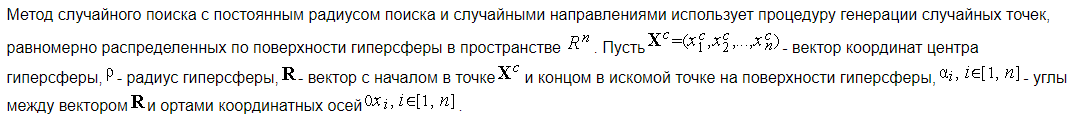

In [12]:
Image("image1.png")

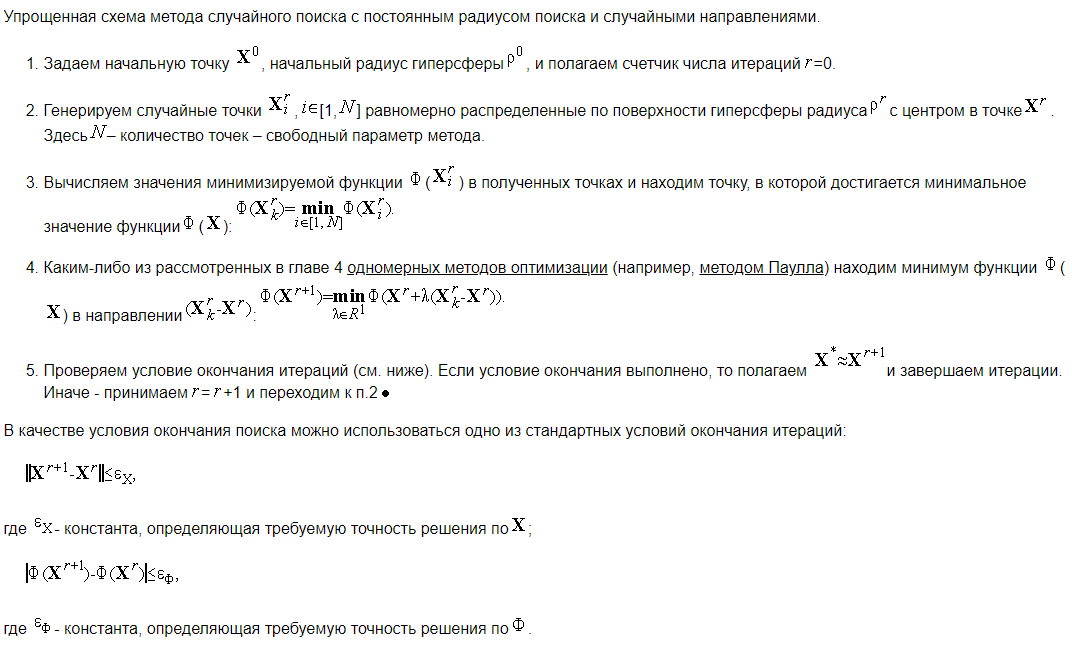

In [13]:
Image("image2.png")

## Вирішення поставленої задачі

### Імпортування бібліотек

In [14]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sympy import *
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Визначення констант

In [15]:
x1, x2, lamb = symbols('x1 x2 lamb')
X0 = [-1.2, 0]
f = (10*(x1-x2)**2 + (x1-1)**2)**4

### Використані функції

#### Функції які використовуються для вирішення задачі

Функції *norma()* - приймає в якості параметру точку х та повертає значення її норми та *step()*:

In [16]:
def norma(x):
    return LA.norm(x)
def step(xi, si):
    return 0.1 * norma(xi)/norma(si)

Функція determine_direction() визначає напрямок:

In [17]:
def determine_direction(min_f, x, s):
    f_minus_step = min_f.subs([(x1, x[0]-step(x, s)*s[0]), (x2, x[1]-step(x, s)*s[1])])
    f_plus_step = min_f.subs([(x1, x[0]+step(x, s)*s[0]), (x2, x[1]+step(x, s)*s[1])])
    f_0 = min_f.subs([(x1, x[0]), (x2, x[1])])
    if (f_minus_step > f_0) and (f_0 > f_plus_step):
        return 1.0
    elif (f_minus_step < f_0) and (f_0 < f_plus_step):
        return -1.0
    else:
        return 0

Swen(), golden() та DSK() - функції обчислення значень за різними алгоритмами 1)Свена, 2)Золотого січіння, 3)ДСК-Пауела:

In [18]:
def Swen(min_f, x_old, x, s):
    if abs(determine_direction(min_f, x, s)) == 1:
        k=0
        x_list = [x_old]
        while(True):
            x_new = x_old + determine_direction(min_f, x,  s) * step(x, s) * 2**k
            x_list.append(x_new)
    
            if min_f.subs([(x1, x[0]+x_new*s[0]), (x2, x[1]+x_new*s[1])]) < min_f.subs([(x1, x[0]+x_old*s[0]), (x2, x[1]+x_old*s[1])]):
                x_old = x_new
                k += 1
                continue
            else:
                break
        return [x_list[-3], x_list[-2], sum(x_list[-2:]) / 2]
    else:
        return [-step(x, s), 0, step(x, s)]
    
def golden(interval, min_f, x, s):
    len_ = interval[2] - interval[0]
    values = [interval[0], interval[0]+0.382*len_,interval[0]+0.618*len_, interval[2]]
    func_val = [min_f.subs([(x1, x[0]+i*s[0]), (x2, x[1]+i*s[1])]) for i in values]
    values.pop(func_val.index(max(func_val)))
    if values[2] - values[0] < 0.1:
        return values[1]
    else:
        return golden(values, min_f, x, s)
    
def DSK(values, min_f, x, s):
    values = [round(x, 14) for x in values]
    if round(values[2] - values[1], 14) == round(values[1] - values[0], 14):
        func_val = [min_f.subs([(x1, x[0]+i*s[0]), (x2, x[1]+i*s[1])]) for i in values]
        delt = values[1] - values[0]
        x_ = values[1] + delt*(func_val[0] - func_val[2]) / (2*(func_val[0] - 2*func_val[1] + func_val[2]))
        if (values[1] - x_ < 0.01) and (func_val[1] - min_f.subs([(x1, x[0]+x_*s[0]), (x2, x[1]+x_*s[1])]) < 0.01):
            return x_
        else:
            values.pop(func_val.index(max(func_val)))
            new_vals = [min(values), x_, max(values)]
            return DSK(new_vals, min_f, x, s)
    else:
        f_new_vals = [min_f.subs([(x1, x[0]+i*s[0]), (x2, x[1]+i*s[1])]) for i in values]
        a1 = (f_new_vals[1] - f_new_vals[0]) / (values[1] - values[0])
        a2 = ((f_new_vals[2] - f_new_vals[0]) / (values[2] - values[0]) \
            - (f_new_vals[1] - f_new_vals[0]) / (values[1] - values[0])) \
            / (values[2] - values[1]) 
        x_ = (values[0] + values[1])/2 - a1/2/a2
        if (values[1] - x_ < 0.01) and (f_new_vals[1] - min_f.subs([(x1, x[0]+x_*s[0]), (x2, x[1]+x_*s[1])]) < 0.01):
            return x_
        else:
            values.pop(f_new_vals.index(max(f_new_vals)))
            new_vals = [min(values), x_, max(values)]
            return DSK(new_vals, min_f, x, s)

Функція search_next_point() функція пошуку наступної точки за алгоритмами золотого січіння або ДСК-Пауела:

In [22]:
def search_next_point(X, r):
    x = np.linspace(X[0]-r, X[0]+r, 100)
    y = [(r**2 - (xi-X[0])**2 + X[1])**0.5 for xi in np.flip(x)]
    points = pd.DataFrame({'x': np.hstack((x, np.flip(x))), 'y': np.hstack((y, -np.flip(y)))}).fillna(0)
    f_value = [f.subs([(x1, i[0]), (x2, i[1])]) for i in list(zip(points['x'], points['y']))]
    points['f_val'] = f_value
    x_min = points[points['f_val']==np.min(f_value)].x.values[0]
    y_min = points[points['f_val']==np.min(f_value)].y.values[0]
    s = np.array([x_min, y_min]) - X
    conf_int = Swen(f, 0, X, s)
    #lamb = golden(conf_int, f, X, s)
    lamb = DSK(conf_int, f, X, s)
    X_new = (X + lamb*s).astype('float64')
    
    return X_new

Функція random_method - загальна функція:

In [23]:
list_normals = [np.inf]
f_values = []
def random_method(X_old, r, n=0):
    
    X_new = search_next_point(X_old, r)
    print(X_new)
    
    list_normals.append(norma(X_new - X_old))
    f_values.append(f.subs([(x1, X_new[0]), (x2, X_new[1])]))
    # критерій закінчення if (list_normals[-1] < 0.001) and ((f_values[-1] - f_values[-2]) < 0.001)
    if (list_normals[-1] < 0.001) and ((f_values[-1] - f_values[-2]) < 0.001):
        return X_new, n
    else:
        n += 1
        return random_method(X_new, r, n)

### Обчислення

In [24]:
ans = random_method(X0, 0.1)

print("\nТочка: ", ans[0], "\nКількість ітерацій: ", ans[1], "\nНорма: ", list_normals[-1], "\nЗначення функції: ", f_values[-1])

<ipython-input-22-5b38e62d0aad>:3: RuntimeWarning: invalid value encountered in double_scalars
  y = [(r**2 - (xi-X[0])**2 + X[1])**0.5 for xi in np.flip(x)]


[-0.42093302 -0.6295812 ]
[-0.37671599 -0.35119912]
[-0.36523154 -0.31086583]
[-0.36042233 -0.29591563]
[-0.35795339 -0.28860965]
[-0.35657586 -0.28463396]
[-0.35576474 -0.28232524]
[-0.35527174 -0.28093338]
[-0.35496626 -0.2800752 ]

Точка:  [-0.35496626 -0.2800752 ] 
Кількість ітерацій:  8 
Норма:  0.0009109234621730849 
Значення функції:  12.8145441048979


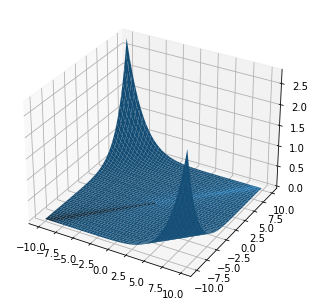

In [26]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy
x = numpy.arange (-10, 10, 0.1)
y = numpy.arange (-10, 10, 0.1)
xgrid, ygrid = numpy.meshgrid(x, y)
zgrid = (10*(xgrid-ygrid)**2 + (xgrid-1)**2)**4
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xgrid, ygrid, zgrid)
pylab.show()

<IPython.core.display.Javascript object>


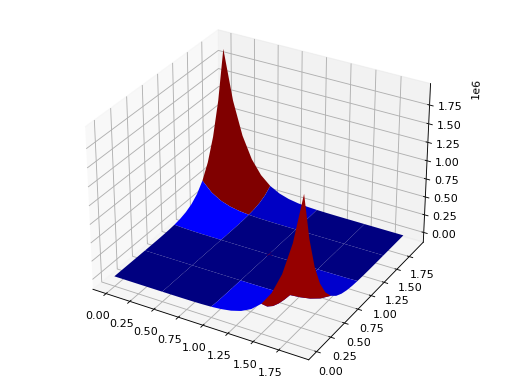

In [28]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import numpy
%matplotlib notebook
x = numpy.arange (0, 2, 0.1)
y = numpy.arange (0, 2, 0.1)
xgrid, ygrid = numpy.meshgrid(x, y)
zgrid = (10*(xgrid-ygrid)**2 + (xgrid-1)**2)**4
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(xgrid, ygrid, zgrid, rstride=5, cstride=5, cmap = cm.jet)
axes.scatter(1, 1, 0, color='red')
pylab.show()

### Висновки

Після дослідження даного методу, можна сказати, що він є досить точним та не ресурсно затратним, якщо правильно підібрати параметри. Найкращі параметри для БО вийшли: 
* Радіус кола: 0.1
* К-сть точок на колі: 20
* Сектор 180 градусів
* Метод одномірного пошуку: ДСК Пауелла
* Точність ЗП – 0.00001
* Параметр Свена: 0.01 * |x||S|
* Критерій зупинки:   |xk+1-xk|||xk|| <0.01   і   f(xk+1) – f(xk) < 0.01

***Для умовної оптимізації можна зробити висновок, що штрафні функції добре стримують точку в області та не дають її покинути.***

## Про виконавця

Студент групи КМ-81,ФПМ  
Руденко Роман Олександрович  

## Посилання



1. Химмельблау Д. Прикладное нелинейное программирование / Химмельблау Д. — М. : Мир, 1975. — 535 с.
2. “Методы оптимизации, практикум. Нифёдов и Балицкая”.
3. https://studfile.net/preview/1676112/page:4/


